#  Use the 4 months customer call data (April - July 2020) and predict next customer call date and purpose  for August 2020.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score,mean_squared_error


In [2]:
# Reading the dataset
df=pd.read_csv("calldata.csv")

# Exploratory data analysis (EDA)

In [3]:
df.shape

(700, 5)

In [4]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    700 non-null    object
 1   AgentID       700 non-null    object
 2   CallDate      700 non-null    object
 3   CallPurpose   700 non-null    object
 4   Satisfaction  700 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 27.5+ KB


In [5]:
# Checking the data
df.head()

,CustomerID,AgentID,CallDate,CallPurpose,Satisfaction
0,C0094,A006,6/27/20 8:43 AM,Cannot login,1
1,C0083,A002,6/3/20 8:58 AM,Credit declined,2
2,C0005,A009,5/14/20 8:50 AM,Account Balance,2
3,C0013,A009,6/25/20 9:29 AM,Credit declined,1
4,C0012,A007,5/7/20 9:38 AM,Cannot login,5


In [6]:
# unique customer calling to customer care
df['CustomerID'].nunique()

105

In [7]:
# Nos of Agents handliing the call
df['AgentID'].nunique()

10

A007    130
A008     72
A005     66
A004     66
A009     65
A006     64
A003     61
A002     60
A001     59
A010     57
Name: AgentID, dtype: int64


Text(0.5, 1.0, 'Agent Counts')

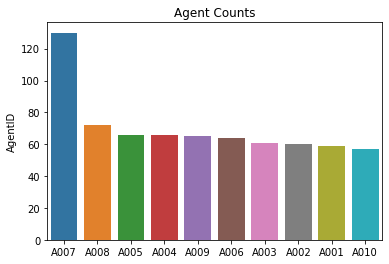

In [8]:
#Nos of volume hnadle by each Agent
print(df['AgentID'].value_counts())
sns.barplot(x=df['AgentID'].value_counts().index, y=df['AgentID'].value_counts())
plt.title("Agent Counts")

Text(0.5, 1.0, 'Purpose Count')

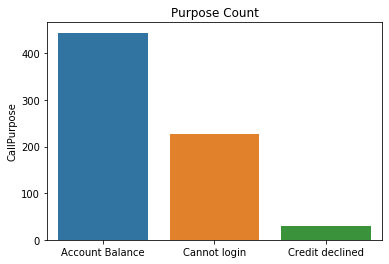

In [9]:
# Frequency of each purpose recevied by customer case
df['CallPurpose'].value_counts()
sns.barplot(x=df['CallPurpose'].value_counts().index, y=df['CallPurpose'].value_counts())
plt.title("Purpose Count")

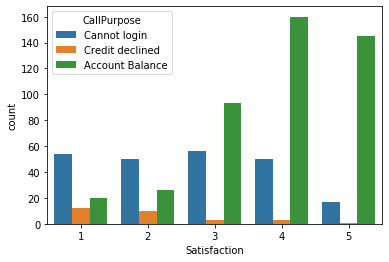

In [10]:
# Staisfication level on each pupose 
sns.countplot(df['Satisfaction'],hue=df['CallPurpose'])
# Credit Decline mostly disatsfied customer 
# Cannot Login is average staisfied customer 
# Account Balance is most satisfied customer from the data set

In [11]:
# Converting to calldate in correct date time format
df["CallDate"]=pd.to_datetime(df["CallDate"])

In [12]:
df.sort_values(['CustomerID','CallDate'])

,CustomerID,AgentID,CallDate,CallPurpose,Satisfaction
410,C0001,A007,2020-04-16 09:58:00,Account Balance,3
97,C0001,A001,2020-04-20 09:50:00,Account Balance,3
316,C0001,A007,2020-06-15 09:32:00,Account Balance,1
186,C0001,A004,2020-07-16 08:51:00,Account Balance,4
448,C0002,A010,2020-05-11 09:14:00,Account Balance,5
...,...,...,...,...,...
430,C0105,A001,2020-04-06 08:48:00,Account Balance,5
411,C0105,A005,2020-06-02 08:40:00,Account Balance,5
38,C0105,A007,2020-06-11 09:33:00,Cannot login,1
453,C0105,A009,2020-06-19 09:12:00,Account Balance,4


In [13]:
#Data Prepration to identify the Purpose Analysis when customer call for first time
df.sort_values(['CustomerID','CallDate'],inplace=True)
df['first_call_customer'] = df.groupby(['CustomerID'])['CallDate'].shift(1)
df['first_call_customer'].fillna("0", inplace=True)
dfnew =df[df['first_call_customer']== '0']

Account Balance    68
Cannot login       34
Credit declined     3
Name: CallPurpose, dtype: int64


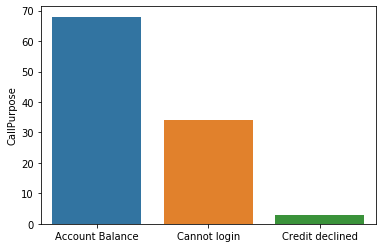

In [14]:
#Purpose Analysis when customer call for first time 
print(dfnew['CallPurpose'].value_counts())
sns.barplot(x=dfnew['CallPurpose'].value_counts().index,y=dfnew['CallPurpose'].value_counts())

In [15]:
# Converting date and time into week, day , weekday, month and  Time foe analysis
df['Week'] = pd.to_datetime(df['CallDate']).dt.week
df['Day'] = pd.to_datetime(df['CallDate']).dt.day
df['WeekDay'] = pd.to_datetime(df['CallDate']).dt.dayofweek
df['Month'] = pd.to_datetime(df['CallDate']).dt.month
df['Time'] = pd.to_datetime(df['CallDate']).dt.time

In [16]:
df.head()

,CustomerID,AgentID,CallDate,CallPurpose,Satisfaction,first_call_customer,Week,Day,WeekDay,Month,Time
410,C0001,A007,2020-04-16 09:58:00,Account Balance,3,0,16,16,3,4,09:58:00
97,C0001,A001,2020-04-20 09:50:00,Account Balance,3,2020-04-16 09:58:00,17,20,0,4,09:50:00
316,C0001,A007,2020-06-15 09:32:00,Account Balance,1,2020-04-20 09:50:00,25,15,0,6,09:32:00
186,C0001,A004,2020-07-16 08:51:00,Account Balance,4,2020-06-15 09:32:00,29,16,3,7,08:51:00
448,C0002,A010,2020-05-11 09:14:00,Account Balance,5,0,20,11,0,5,09:14:00


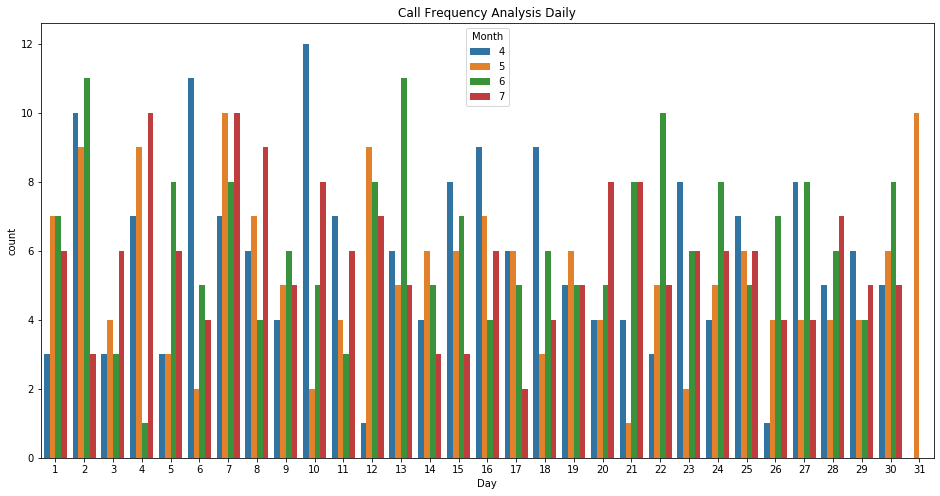

In [17]:
# Call per day analysis for each month
plt.figure(figsize = (16,8))
plt.title("Call Frequency Analysis Daily")
sns.countplot(df['Day'],hue=df['Month'])

Month
4    176
5    165
6    187
7    172
Name: Satisfaction, dtype: int64


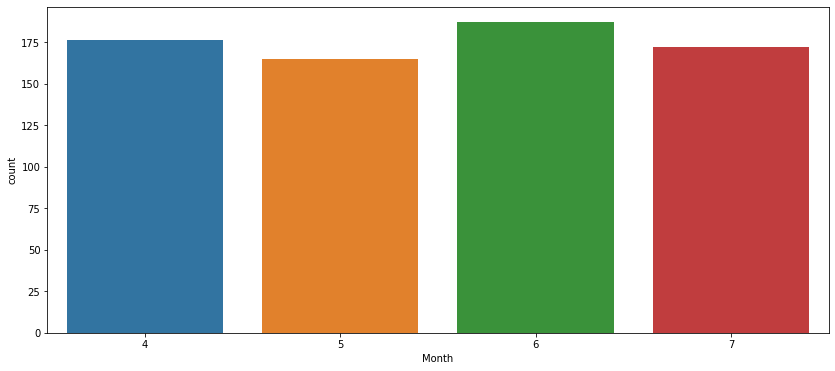

In [18]:
# Per month day analysis
plt.figure(figsize = (14,6))
print(df.groupby('Month').count()['Satisfaction'])
sns.countplot(df['Month'])

In [19]:
# Average call handle by each month
print("Average call handle by each month" , df['Month'].value_counts().values.mean())

Average call handle by each month 175.0


In [20]:
#To check the pattern by observing some sample how much customer call for each month and frequency of each month 
df.groupby(['CustomerID','Month']).count()['CallDate'].head(40)

CustomerID  Month
C0001       4        2
            6        1
            7        1
C0002       5        2
            7        4
C0003       4        1
            5        2
            6        2
C0004       4        3
            5        2
            6        3
            7        2
C0005       4        1
            5        4
            6        3
            7        1
C0006       4        1
            5        2
            6        4
            7        1
C0007       5        1
            6        5
            7        3
C0008       4        1
            6        1
            7        1
C0009       4        4
            5        1
            6        1
            7        1
C0010       4        1
            5        1
            6        3
C0011       5        1
            7        2
C0012       4        2
            5        3
            6        1
C0013       4        5
            5        1
Name: CallDate, dtype: int64

# Model Building 

# Approach
1. To predict next customer call date 
Features:
    - Days between current vs previous call day
    - Days since user called first
    - satisfaction
    - can have agent as on-hot coded feature also
    
Target:
    days from previous or first call

2. To predict next customer call Purpose:

Features:
    - Customer ID
    - Agent ID
    - Staisfaction Level
    
Target:
 Purpose of next call
 

# Data Prepration

There are a number of preprocessing steps we need to do before building the model

In [21]:
# Data Prepration for model - Sorting value as per the customer ID
df.sort_values(['CustomerID','CallDate'],inplace=True)
df.head(20)

,CustomerID,AgentID,CallDate,CallPurpose,Satisfaction,first_call_customer,Week,Day,WeekDay,Month,Time
410,C0001,A007,2020-04-16 09:58:00,Account Balance,3,0,16,16,3,4,09:58:00
97,C0001,A001,2020-04-20 09:50:00,Account Balance,3,2020-04-16 09:58:00,17,20,0,4,09:50:00
316,C0001,A007,2020-06-15 09:32:00,Account Balance,1,2020-04-20 09:50:00,25,15,0,6,09:32:00
186,C0001,A004,2020-07-16 08:51:00,Account Balance,4,2020-06-15 09:32:00,29,16,3,7,08:51:00
448,C0002,A010,2020-05-11 09:14:00,Account Balance,5,0,20,11,0,5,09:14:00
486,C0002,A007,2020-05-25 09:53:00,Cannot login,2,2020-05-11 09:14:00,22,25,0,5,09:53:00
503,C0002,A007,2020-07-08 09:49:00,Cannot login,1,2020-05-25 09:53:00,28,8,2,7,09:49:00
517,C0002,A007,2020-07-17 09:03:00,Cannot login,1,2020-07-08 09:49:00,29,17,4,7,09:03:00
419,C0002,A008,2020-07-20 09:20:00,Account Balance,4,2020-07-17 09:03:00,30,20,0,7,09:20:00
344,C0002,A002,2020-07-27 08:00:00,Cannot login,4,2020-07-20 09:20:00,31,27,0,7,08:00:00


In [22]:
df['next_call_date']=df.groupby(['CustomerID'])['CallDate'].shift(-1)

In [23]:
df['days_diff']  =(df['next_call_date']-df['CallDate'])/ np.timedelta64(1, 'D')

In [24]:
df['days_from_start'] = df.sort_values(['CustomerID','CallDate']).groupby('CustomerID')['days_diff'].cumsum()

In [25]:
df.head(10)

,CustomerID,AgentID,CallDate,CallPurpose,Satisfaction,first_call_customer,Week,Day,WeekDay,Month,Time,next_call_date,days_diff,days_from_start
410,C0001,A007,2020-04-16 09:58:00,Account Balance,3,0,16,16,3,4,09:58:00,2020-04-20 09:50:00,3.994444,3.994444
97,C0001,A001,2020-04-20 09:50:00,Account Balance,3,2020-04-16 09:58:00,17,20,0,4,09:50:00,2020-06-15 09:32:00,55.987500,59.981944
316,C0001,A007,2020-06-15 09:32:00,Account Balance,1,2020-04-20 09:50:00,25,15,0,6,09:32:00,2020-07-16 08:51:00,30.971528,90.953472
186,C0001,A004,2020-07-16 08:51:00,Account Balance,4,2020-06-15 09:32:00,29,16,3,7,08:51:00,NaT,NaN,NaN
448,C0002,A010,2020-05-11 09:14:00,Account Balance,5,0,20,11,0,5,09:14:00,2020-05-25 09:53:00,14.027083,14.027083
486,C0002,A007,2020-05-25 09:53:00,Cannot login,2,2020-05-11 09:14:00,22,25,0,5,09:53:00,2020-07-08 09:49:00,43.997222,58.024306
503,C0002,A007,2020-07-08 09:49:00,Cannot login,1,2020-05-25 09:53:00,28,8,2,7,09:49:00,2020-07-17 09:03:00,8.968056,66.992361
517,C0002,A007,2020-07-17 09:03:00,Cannot login,1,2020-07-08 09:49:00,29,17,4,7,09:03:00,2020-07-20 09:20:00,3.011806,70.004167
419,C0002,A008,2020-07-20 09:20:00,Account Balance,4,2020-07-17 09:03:00,30,20,0,7,09:20:00,2020-07-27 08:00:00,6.944444,76.948611
344,C0002,A002,2020-07-27 08:00:00,Cannot login,4,2020-07-20 09:20:00,31,27,0,7,08:00:00,NaT,NaN,NaN


In [26]:
df.fillna(0,inplace=True)

In [27]:
df.head(10)

,CustomerID,AgentID,CallDate,CallPurpose,Satisfaction,first_call_customer,Week,Day,WeekDay,Month,Time,next_call_date,days_diff,days_from_start
410,C0001,A007,2020-04-16 09:58:00,Account Balance,3,0,16,16,3,4,09:58:00,2020-04-20 09:50:00,3.994444,3.994444
97,C0001,A001,2020-04-20 09:50:00,Account Balance,3,2020-04-16 09:58:00,17,20,0,4,09:50:00,2020-06-15 09:32:00,55.987500,59.981944
316,C0001,A007,2020-06-15 09:32:00,Account Balance,1,2020-04-20 09:50:00,25,15,0,6,09:32:00,2020-07-16 08:51:00,30.971528,90.953472
186,C0001,A004,2020-07-16 08:51:00,Account Balance,4,2020-06-15 09:32:00,29,16,3,7,08:51:00,0,0.000000,0.000000
448,C0002,A010,2020-05-11 09:14:00,Account Balance,5,0,20,11,0,5,09:14:00,2020-05-25 09:53:00,14.027083,14.027083
486,C0002,A007,2020-05-25 09:53:00,Cannot login,2,2020-05-11 09:14:00,22,25,0,5,09:53:00,2020-07-08 09:49:00,43.997222,58.024306
503,C0002,A007,2020-07-08 09:49:00,Cannot login,1,2020-05-25 09:53:00,28,8,2,7,09:49:00,2020-07-17 09:03:00,8.968056,66.992361
517,C0002,A007,2020-07-17 09:03:00,Cannot login,1,2020-07-08 09:49:00,29,17,4,7,09:03:00,2020-07-20 09:20:00,3.011806,70.004167
419,C0002,A008,2020-07-20 09:20:00,Account Balance,4,2020-07-17 09:03:00,30,20,0,7,09:20:00,2020-07-27 08:00:00,6.944444,76.948611
344,C0002,A002,2020-07-27 08:00:00,Cannot login,4,2020-07-20 09:20:00,31,27,0,7,08:00:00,0,0.000000,0.000000


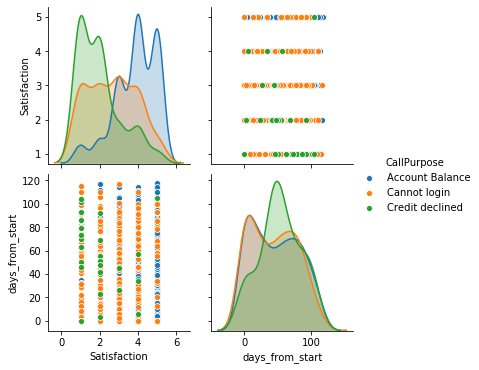

In [28]:
sns.pairplot(df[['Satisfaction','days_from_start','CallPurpose']],hue='CallPurpose')

In [29]:
df[['Satisfaction','days_diff','days_from_start']]

,Satisfaction,days_diff,days_from_start
410,3,3.994444,3.994444
97,3,55.987500,59.981944
316,1,30.971528,90.953472
186,4,0.000000,0.000000
448,5,14.027083,14.027083
...,...,...,...
430,5,56.994444,56.994444
411,5,9.036806,66.031250
38,1,7.985417,74.016667
453,4,2.984722,77.001389


In [30]:
df.reset_index(drop=True,inplace=True)
df

,CustomerID,AgentID,CallDate,CallPurpose,Satisfaction,first_call_customer,Week,Day,WeekDay,Month,Time,next_call_date,days_diff,days_from_start
0,C0001,A007,2020-04-16 09:58:00,Account Balance,3,0,16,16,3,4,09:58:00,2020-04-20 09:50:00,3.994444,3.994444
1,C0001,A001,2020-04-20 09:50:00,Account Balance,3,2020-04-16 09:58:00,17,20,0,4,09:50:00,2020-06-15 09:32:00,55.987500,59.981944
2,C0001,A007,2020-06-15 09:32:00,Account Balance,1,2020-04-20 09:50:00,25,15,0,6,09:32:00,2020-07-16 08:51:00,30.971528,90.953472
3,C0001,A004,2020-07-16 08:51:00,Account Balance,4,2020-06-15 09:32:00,29,16,3,7,08:51:00,0,0.000000,0.000000
4,C0002,A010,2020-05-11 09:14:00,Account Balance,5,0,20,11,0,5,09:14:00,2020-05-25 09:53:00,14.027083,14.027083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,C0105,A001,2020-04-06 08:48:00,Account Balance,5,0,15,6,0,4,08:48:00,2020-06-02 08:40:00,56.994444,56.994444
696,C0105,A005,2020-06-02 08:40:00,Account Balance,5,2020-04-06 08:48:00,23,2,1,6,08:40:00,2020-06-11 09:33:00,9.036806,66.031250
697,C0105,A007,2020-06-11 09:33:00,Cannot login,1,2020-06-02 08:40:00,24,11,3,6,09:33:00,2020-06-19 09:12:00,7.985417,74.016667
698,C0105,A009,2020-06-19 09:12:00,Account Balance,4,2020-06-11 09:33:00,25,19,4,6,09:12:00,2020-06-22 08:50:00,2.984722,77.001389


Firstly, note that we have both categorical and numeric features as predictors.

we need to encode the categorical variables into a standard format so that sklearn can understand them and build the tree. We'll do that using the LabelEncoder() class, which comes with sklearn.preprocessing. 


In [31]:
# apply Label encoder to df_categorical to convert categorical value to numeric
from sklearn import preprocessing
df_categorical = df[['CustomerID','AgentID','CallPurpose']]


le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)

In [32]:
new_df=pd.concat([df_categorical,df['Satisfaction'],df['Month']],axis=1)

In [33]:
# As we want to consider train on the data for the month of May ,June and July - for predicting purpose 
train=new_df[new_df['Month']<7].copy()

In [34]:
# As we want test the data we are considering for the month of August 
test=new_df[new_df['Month']==7].copy()

In [35]:
test.head()

,CustomerID,AgentID,CallPurpose,Satisfaction,Month
3,0,3,0,4,7
6,1,6,1,1,7
7,1,6,1,1,7
8,1,7,0,4,7
9,1,1,1,4,7


In [36]:
# Splitting the data into train and test
X_train=train[['CustomerID','AgentID','Satisfaction','Satisfaction']]
X_test=test[['CustomerID','AgentID','Satisfaction','Satisfaction']]
y_train=train['CallPurpose']
y_test=test['CallPurpose']

In [37]:
X_train.head()

,CustomerID,AgentID,Satisfaction,Satisfaction
0,0,6,3,3
1,0,0,3,3
2,0,6,1,1
4,1,9,5,5
5,1,6,2,2


# Model Building :To predict purpose of customer call 

In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [39]:
#Comparing Algorithms
def scores(i):
    lin = i()
    lin.fit(X_train, y_train)
    y_pred=lin.predict(X_test)
    lin_r=accuracy_score(y_test, y_pred)
    s.append(lin_r)

In [40]:
#Checking the scores by using our function
algos=[LinearDiscriminantAnalysis,RandomForestClassifier,SVC,KNeighborsClassifier,GaussianNB,DecisionTreeClassifier,LogisticRegression]
s=[]
for i in algos:
    scores(i)

C:\Users\7504468\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [41]:
#Checking the score
models = pd.DataFrame({
    'Method': ['LinearDiscriminantAnalysis','RandomForestClassifier','SVC,KNeighborsClassifier','GaussianNB','DecisionTreeClassifier','LogisticRegression'],
    'Score': [s[0],s[1],s[2],s[3],s[4],s[5]]})
models.sort_values(by='Score', ascending=False)

,Method,Score
0,LinearDiscriminantAnalysis,0.744186
4,DecisionTreeClassifier,0.744186
3,GaussianNB,0.656977
2,"SVC,KNeighborsClassifier",0.645349
1,RandomForestClassifier,0.569767
5,LogisticRegression,0.511628


In [42]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier()
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [43]:
# Let's check the evaluation metrics of our default model for train

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred = dt_default.predict(X_train)

print(confusion_matrix(y_train,y_pred))
print(accuracy_score(y_train,y_pred))

[[333   0   0]
 [  7 165   0]
 [  2   0  21]]
0.9829545454545454


In [44]:
# Let's check the evaluation metrics of our default model test

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[76 33  2]
 [35 15  5]
 [ 1  5  0]]
0.5290697674418605


In [45]:
from sklearn.model_selection import cross_val_predict
#import sklearn.grid_search
from sklearn.ensemble import RandomForestRegressor

In [46]:
rfg_default = RandomForestRegressor()

In [47]:
rfg_default.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [48]:
from sklearn.model_selection import cross_val_predict
#import sklearn.grid_search
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
def rfr_model(X, y):
    # Perform Grid-Search
    gsc = GridSearchCV(estimator=RandomForestClassifier(),
                       param_grid={'max_depth': range(3,5),'n_estimators': (500, 700),'min_samples_leaf':[5,10,50,100]},
                       cv=5, verbose=5,n_jobs=-1)
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    rfr = RandomForestClassifier(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],random_state=False, verbose=False)
    # Perform K-Fold CV
    scores = cross_val_predict(rfr, X, y, cv=10)
    return rfr,scores,best_params

In [49]:
model, score,best_params = rfr_model(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   21.6s finished


In [50]:
best_params

{'max_depth': 3, 'min_samples_leaf': 50, 'n_estimators': 500}

In [51]:
final_model =  RandomForestClassifier(max_depth=3, n_estimators=500, min_samples_leaf= 50, random_state=False, verbose=False)


In [52]:
final_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=False,
                       verbose=False, warm_start=False)

In [53]:
y_pred = final_model.predict(X_train)
print(confusion_matrix(y_train,y_pred))
print(accuracy_score(y_train,y_pred))

[[293  40   0]
 [ 91  81   0]
 [  6  17   0]]
0.7083333333333334


# Final Result for Randomforest to predict Purpose

In [54]:
# Let's check the evaluation metrics of our default model test

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = final_model.predict(X_test)

# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[105   6   0]
 [ 32  23   0]
 [  1   5   0]]
0.7441860465116279


#  Model Building :To predict next customer call 

In [55]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [56]:
df.head()

,CustomerID,AgentID,CallDate,CallPurpose,Satisfaction,first_call_customer,Week,Day,WeekDay,Month,Time,next_call_date,days_diff,days_from_start
0,C0001,A007,2020-04-16 09:58:00,Account Balance,3,0,16,16,3,4,09:58:00,2020-04-20 09:50:00,3.994444,3.994444
1,C0001,A001,2020-04-20 09:50:00,Account Balance,3,2020-04-16 09:58:00,17,20,0,4,09:50:00,2020-06-15 09:32:00,55.987500,59.981944
2,C0001,A007,2020-06-15 09:32:00,Account Balance,1,2020-04-20 09:50:00,25,15,0,6,09:32:00,2020-07-16 08:51:00,30.971528,90.953472
3,C0001,A004,2020-07-16 08:51:00,Account Balance,4,2020-06-15 09:32:00,29,16,3,7,08:51:00,0,0.000000,0.000000
4,C0002,A010,2020-05-11 09:14:00,Account Balance,5,0,20,11,0,5,09:14:00,2020-05-25 09:53:00,14.027083,14.027083


In [57]:
test= df[df.days_from_start>0].copy()
unseen= df[df.days_from_start==0].copy()

In [58]:
unseen.head()

,CustomerID,AgentID,CallDate,CallPurpose,Satisfaction,first_call_customer,Week,Day,WeekDay,Month,Time,next_call_date,days_diff,days_from_start
3,C0001,A004,2020-07-16 08:51:00,Account Balance,4,2020-06-15 09:32:00,29,16,3,7,08:51:00,0,0.0,0.0
9,C0002,A002,2020-07-27 08:00:00,Cannot login,4,2020-07-20 09:20:00,31,27,0,7,08:00:00,0,0.0,0.0
14,C0003,A010,2020-06-22 08:43:00,Cannot login,3,2020-06-02 08:46:00,26,22,0,6,08:43:00,0,0.0,0.0
24,C0004,A004,2020-07-17 08:44:00,Account Balance,4,2020-07-02 09:51:00,29,17,4,7,08:44:00,0,0.0,0.0
33,C0005,A002,2020-07-26 09:58:00,Account Balance,4,2020-06-22 09:19:00,30,26,6,7,09:58:00,0,0.0,0.0


In [59]:
features=['Satisfaction','days_diff']
target = ['days_from_start']

In [60]:
X_train,X_test, y_train,y_test = train_test_split(test[['Satisfaction','days_diff']],test['days_from_start'])

In [61]:
#Comparing Algorithms
def scores(i):
    lin = i()
    lin.fit(X_train, y_train)
    y_pred=lin.predict(X_test)
    lin_r= r2_score(y_test, y_pred)
    s.append(lin_r)

In [62]:
#Checking the scores by using our function
algos=[LinearRegression,KNeighborsRegressor,RandomForestRegressor,Lasso,ElasticNet,DecisionTreeRegressor]
s=[]
for i in algos:
    scores(i)

In [63]:
#Checking the score
models = pd.DataFrame({
    'Method': ['LinearRegression', 'KNeighborsRegressor', 
              'RandomForestRegressor', 'Lasso','DecisionTreeRegressor'],
    'Score': [s[0],s[1],s[2],s[3],s[4]]})
models.sort_values(by='Score', ascending=False)

,Method,Score
0,LinearRegression,0.019113
4,DecisionTreeRegressor,0.014711
3,Lasso,0.012942
1,KNeighborsRegressor,-0.226351
2,RandomForestRegressor,-0.436064


In [64]:
clf =LinearRegression()

In [65]:
#clf.fit(train[features],train[target])
clf.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
clf.score(X_train,y_train)

0.0408829786037428

In [67]:
y_pred= clf.predict(X_test)

In [68]:
clf.score(X_test, y_test)

0.019112515312936562

In [69]:
r2_score(y_test,y_pred)

0.019112515312936562

In [70]:
from sklearn.model_selection import cross_val_predict
#import sklearn.grid_search
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
def rfr_model(X, y):
    # Perform Grid-Search
    gsc = GridSearchCV(estimator=RandomForestRegressor(),
                       param_grid={'max_depth': range(3,5),'n_estimators': (500, 700),'min_samples_leaf':[5,10,50,100]},
                       cv=5, verbose=5,n_jobs=-1)
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],                               random_state=False, verbose=False)
    # Perform K-Fold CV
    scores = cross_val_predict(rfr, X, y, cv=10)
    return rfr,scores,best_params

In [71]:
model, score,best_params = rfr_model(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   17.9s finished


In [72]:
best_params

{'max_depth': 4, 'min_samples_leaf': 5, 'n_estimators': 700}

In [73]:
best_params

{'max_depth': 4, 'min_samples_leaf': 5, 'n_estimators': 700}

In [74]:
final_model =  RandomForestRegressor(max_depth=4, n_estimators=700, min_samples_leaf= 10, random_state=False, verbose=False)


In [75]:
final_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=700, n_jobs=None, oob_score=False,
                      random_state=False, verbose=False, warm_start=False)

In [76]:
final_model.predict(X_test)

array([58.05173171, 55.49048645, 61.10598666, 52.30651059, 52.95473122,
       40.63014705, 56.31102767, 59.6280992 , 58.8284915 , 58.33204301,
       45.23156045, 62.06758385, 49.31608756, 61.10695239, 51.75249031,
       61.34969278, 60.16842799, 59.6803051 , 57.91485901, 57.32341583,
       61.99673021, 55.49048645, 51.65297248, 58.98824534, 42.8157828 ,
       47.87577495, 58.82154206, 54.53794069, 58.43963444, 50.01458879,
       54.30431043, 51.44320791, 49.96704228, 47.89482329, 55.28161921,
       50.88822857, 57.61349479, 51.39701087, 59.35289001, 49.58059907,
       60.03621619, 50.29239727, 55.49048645, 54.52754417, 57.09168452,
       76.42769712, 57.90104018, 58.19157706, 57.41951082, 75.65383767,
       52.28876362, 60.2404555 , 50.14912908, 60.07235022, 57.88433498,
       56.48944647, 51.65440316, 49.58059907, 64.88546633, 49.96704228,
       58.02883818, 56.59327153, 50.73783231, 60.72842994, 60.1492228 ,
       52.14044992, 49.40596243, 56.16579525, 61.87404668, 57.78

In [77]:
y_pred = final_model.predict(test[features])
r2_score(y_test,final_model.predict(X_test))

-0.03018776624352193

In [78]:
prediction_df = df.merge(test,on=None)

In [79]:
prediction_df['future_days_call']=y_pred
prediction_df

,CustomerID,AgentID,CallDate,CallPurpose,Satisfaction,first_call_customer,Week,Day,WeekDay,Month,Time,next_call_date,days_diff,days_from_start,future_days_call
0,C0001,A007,2020-04-16 09:58:00,Account Balance,3,0,16,16,3,4,09:58:00,2020-04-20 09:50:00,3.994444,3.994444,48.491108
1,C0001,A001,2020-04-20 09:50:00,Account Balance,3,2020-04-16 09:58:00,17,20,0,4,09:50:00,2020-06-15 09:32:00,55.987500,59.981944,75.529118
2,C0001,A007,2020-06-15 09:32:00,Account Balance,1,2020-04-20 09:50:00,25,15,0,6,09:32:00,2020-07-16 08:51:00,30.971528,90.953472,59.337948
3,C0002,A010,2020-05-11 09:14:00,Account Balance,5,0,20,11,0,5,09:14:00,2020-05-25 09:53:00,14.027083,14.027083,58.857852
4,C0002,A007,2020-05-25 09:53:00,Cannot login,2,2020-05-11 09:14:00,22,25,0,5,09:53:00,2020-07-08 09:49:00,43.997222,58.024306,65.641266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,C0104,A004,2020-06-26 08:23:00,Credit declined,1,2020-05-28 08:11:00,26,26,4,6,08:23:00,2020-07-11 08:43:00,15.013889,62.981944,58.028838
591,C0105,A001,2020-04-06 08:48:00,Account Balance,5,0,15,6,0,4,08:48:00,2020-06-02 08:40:00,56.994444,56.994444,77.331492
592,C0105,A005,2020-06-02 08:40:00,Account Balance,5,2020-04-06 08:48:00,23,2,1,6,08:40:00,2020-06-11 09:33:00,9.036806,66.031250,64.928960
593,C0105,A007,2020-06-11 09:33:00,Cannot login,1,2020-06-02 08:40:00,24,11,3,6,09:33:00,2020-06-19 09:12:00,7.985417,74.016667,60.684725


In [80]:
pred2=pd.DataFrame()
pred2['predicted']=final_model.predict(test[features])
pred2['actual']=test[target].values

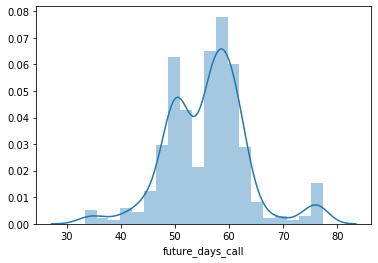

In [81]:
sns.distplot(prediction_df['future_days_call'])

In [82]:
pred2

,predicted,actual
0,48.491108,3.994444
1,75.529118,59.981944
2,59.337948,90.953472
3,58.857852,14.027083
4,65.641266,58.024306
...,...,...
590,58.028838,62.981944
591,77.331492,56.994444
592,64.928960,66.031250
593,60.684725,74.016667
